<a href="https://colab.research.google.com/github/sergiogut1805/03MAIR-Algoritmos-de-optimizacion/blob/master/VC01_1_distancias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1>VC01: Uso de las medidas de (di)similitud</h1></center>

Esta primera práctica está enfocada al estudio de las diferentes medidas de similitud y disimilitud-distancia que hemos visto en la parte teórica. 
Programaremos nuestras propias versiones de diferentes medidas y veremos cómo se usan las que incorporan las diferentes librerías de Python.

Para empezar, cargamos las librerías que vamos a necesitar:


In [0]:
import numpy as np
import itertools as it
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


Creamos y cargamos los ejemplos y los conjuntos de datos que usamos en esta práctica:


Text(-0.225558,-0.328535,'X-2')

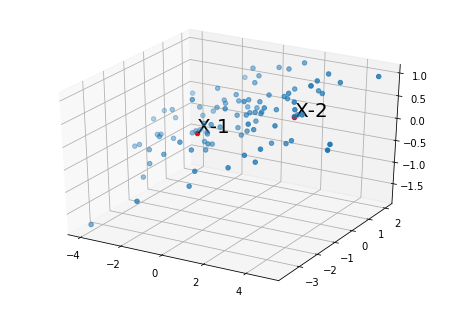

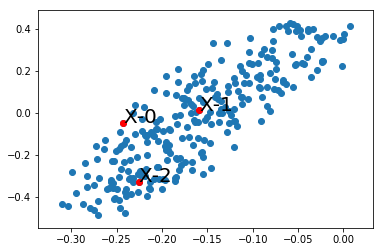

In [0]:
np.random.seed(19) # Fijamos una semilla para asegurar la reproducibilidad de la práctica

n_samples = 100
C = np.array([[1., 0., -0.1], [1.7, .4, .3], [.7, 1.1, .5]])
X = np.dot(np.random.randn(n_samples, 3), C)

# Veamos qué pinta tienen los datos
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[2:,0], X[2:,1], X[2:,2])

ax.scatter(X[1,0], X[1,1], X[1,2], color='red')
ax.text(X[1,0],X[1,1],X[1,2],  '%s' % ("X-1"), size=20, zorder=1, color='k') 

ax.scatter(X[2,0], X[2,1], X[2,2], color='red')
ax.text(X[2,0],X[2,1],X[2,2],  '%s' % ("X-2"), size=20, zorder=1, color='k') 

# Cargamos también un conjunto de datos
data_file_url = 'https://raw.githubusercontent.com/jhernandezgonzalez/unsupervisedlearning/master/datasets/sinteticos/dataset_dos_guassianas.csv'
D = np.array(pd.read_csv(data_file_url))
D = D[ np.random.choice(np.arange(D.shape[0]), D.shape[0], replace=False) ,:]
Dx = D[D[:,2]==2,0:2] # nos quedamos con uno de los clústeres y eliminamos la variable de la categoría

fig, ax = plt.subplots()
ax.scatter(Dx[:,0],Dx[:,1])

ax.scatter(Dx[0,0], Dx[0,1], color='red')
ax.text(Dx[0,0],Dx[0,1], '%s' % ("X-0"), size=20, zorder=1, color='k') 
ax.scatter(Dx[1,0], Dx[1,1], color='red')
ax.text(Dx[1,0],Dx[1,1], '%s' % ("X-1"), size=20, zorder=1, color='k') 
ax.scatter(Dx[2,0], Dx[2,1], color='red')
ax.text(Dx[2,0],Dx[2,1], '%s' % ("X-2"), size=20, zorder=1, color='k') 




Sabemos que la distancia euclidiana se define como la raiz cuadrada de la suma de las diferencias por dimensión al cuadrado:


In [0]:
def distancia_euclidiana(x, y):   
    return np.sqrt(np.sum((x - y) ** 2))

print(X[1:3,:])
print('Distancia = ',distancia_euclidiana(X[1,:],X[2,:]))

[[-1.60032018 -0.50955328 -0.26250981]
 [ 2.19931415  0.50995647  0.19689852]]
Distancia =  3.96076724536307



De manera similar, la distancia manhattan se define como la suma de las diferencias por dimensión en valor absoluto:


In [0]:
def distancia_manhattan(x, y):   
    return np.sum(np.absolute(x - y))

print('Distancia = ',distancia_manhattan(X[1,:],X[2,:]))

Distancia =  5.278552409196977



Ambas son casos particulares de la p-norma:


In [0]:
def p_norma(x, y, p):   
    return np.sum(np.absolute(x - y) ** p)#### TU CODIGO AQUI ####

print('Diferencia entre 1-norma y dist. manhattan  = ',p_norma(X[1,:],X[2,:],1)-distancia_manhattan(X[1,:],X[2,:]))
print('Diferencia entre 2-norma y dist. euclidiana = ',p_norma(X[1,:],X[2,:],2)-distancia_euclidiana(X[1,:],X[2,:]))

Diferencia entre 1-norma y dist. manhattan  =  0.0
Diferencia entre 2-norma y dist. euclidiana =  0.0



Otra generalización de la distancia euclidiana es la distancia de Mahalanobis, que tiene en cuenta la varianza de cada dimensión y las covarianzas entre ellas. Para poder calcular la distancia de Mahalanobis, en primer lugar se ha de estimar la matriz de covarianzas a partir de los datos:
https://es.wikipedia.org/wiki/Matriz_de_covarianza

En pocas palabras, se puede estimar, para cada par de dimensiones (a y b), como la suma del producto de cada valor de a menos su valor medio por el valor de b menos su valor medio, todo ello partido por el número de instancias menos 1.


In [0]:
def matriz_covarianza(X):
    Xm = X-np.mean(X,axis=0)
    mC = np.zeros((X.shape[1],X.shape[1]))
    for pair in it.product(np.arange(X.shape[1]), repeat=2):
        mC[pair] = np.sum()/float(X.shape[0] - 1)
    return mC


Una vez definida la matriz de covarianzas, la distancia de Mahalanobis se puede calcular, para dos instancias x e y, como la raiz cuadrada del producto del vector (x-y) transpuesto por la <b>inversa</b> de la matriz de covarianzas nuevamente por el vector (x-y):


In [0]:
def distancia_mahalanobis(x,y,mCi):
    v = x-y
    v.shape=(v.size,1)
    res = #### TU CODIGO AQUI ####
    return res

mC = matriz_covarianza(X)
mCi = np.linalg.inv(mC)
print('Distancia = ',distancia_mahalanobis(X[1,:],X[2,:],mCi), ' (** ESTA ES LA RESPUESTA A INCLUIR EN EL CAMPUS **)')


Como se comentaba en la clase de teoría, la distancia euclidiana y la de mahalanobis pueden dar resultados contradictorios. Veamos un ejemplo con el dataset que hemos cargado, Dx. En la imagen previa se pueden observar las posiciones de X0, X1 y X2. La instancia más cercana a X1 es X0 según la distancia euclidiana y X2 según la de Mahalanobis:


In [0]:
mdC = matriz_covarianza(Dx)
mdCi = np.linalg.inv(mdC)
print('Distancia X1-X0 mahalanobis = ',distancia_mahalanobis(Dx[1,:],Dx[0,:],mdCi), 
      '\tvs. euclidiana = ', distancia_euclidiana(Dx[1,:],Dx[0,:]))
print('Distancia X1-X2 mahalanobis = ',distancia_mahalanobis(Dx[1,:],Dx[2,:],mdCi), 
      '\tvs. euclidiana = ', distancia_euclidiana(Dx[1,:],Dx[2,:]))


La similitud de coseno se define, por su parte, como el producto escalar de los dos vectores (instancias) dividido por el producto de las magnitudes de ambos vectores:


In [0]:
def similitud_coseno(x, y):
    return np.dot(x, y) / (np.sqrt(np.dot(x, x)) * #### TU CODIGO AQUI ####
                          )

print(similitud_coseno(X[0,:],X[1,:]))
print(similitud_coseno(X[0,:],X[2,:]))


Como ésta es una medida de similitud entre -1 y 1 (donde el valor 1 representa la misma dirección, o máxima similitud, y el valor -1 representa direcciones contrarias, o máxima disimilitud), si tomamos 1-similitud como medida de disimilitud no podemos hablar propiamente de distancia. Es más correcto referirnos a ella como disimilitud coseno:


In [0]:
def disimilitud_coseno(x, y):
    return 1-similitud_coseno(x, y)


Si todas las variables son binarias, podemos usar otro tipo de medidas, tales como:


In [0]:
def distancia_hamming(x, y):
    return np.sum(x!=y)

def similitud_jaccard(x, y):
    return np.sum(x*y)/float(np.sum(x+y>0))

def distancia_jaccard(x, y):
    return 1-similitud_jaccard(x,y)

Xb = np.random.randint(0,2,n_samples*5)
Xb.shape = (n_samples, 5)

print(distancia_hamming(Xb[1,:],Xb[2,:]))
print(distancia_jaccard(Xb[1,:],Xb[2,:]))



Si entre nuestras variables existen variables discretas o categóricas, podemos usar una medida específica. En este caso, tendremos que combinarla con el resto mediante una distancia heterogénea:


In [0]:
# solo para una dimension
def distancia_categorica(x, y):
    return 1-int(x==y)

def distancia_heterogenea(x, y, w, distancias):
    return np.sum([w[d]*distancias[d](x[d],y[d]) for d in np.arange(x.size)])

w = np.array([1,1,1,1,1])
ds = [distancia_manhattan,distancia_manhattan, distancia_categorica,distancia_categorica,distancia_categorica]

#distancia_heterogenea(Xb[1,:],Xb[2,:],w,ds)


El vector de pesos w nos permite asignar diferente relevancia a las distintas dimensiones. Es posible calcular este vector de manera automática, siguiendo el método de Hastie et al. (2008):


In [0]:

def calcular_pesos(X, distancias):
    vW = np.zeros(X.shape[1])
    for d in np.arange(X.shape[1]):
        for pair in it.product(np.arange(X.shape[0]), repeat=2):
            vW[d] += distancias[d](X[pair[0],d],X[pair[1],d])
    vW /= float(X.shape[0]**2)
    return 1/vW

w_a = calcular_pesos(Xb, ds)

print(w_a)

print('Distancia heterogenea sin ajustar w  = ',distancia_heterogenea(Xb[1,:],Xb[2,:],w,ds))
print('Distancia heterogenea con w ajustado = ',distancia_heterogenea(Xb[1,:],Xb[2,:],w_a,ds))


<h2>Matriz de distancias</h2>

Un concepto clave del aprendizaje no supervisado es el de <b>matriz de distancias</b>. Muchos algoritmos son capaces de funcionar directamente usando esta matriz en vez de la matriz-conjunto de datos de entrenamiento. Consiste en calcula la distancia entre todos los pares de instancias del conjunto de entrenamiento:


In [0]:
def matriz_distancias(X, distancia):
    mD = np.zeros((X.shape[0],X.shape[0]))
    for pair in it.product(np.arange(X.shape[0]), repeat=2):
        mD[pair] = distancia()
    return mD

Ma = matriz_distancias(X, distancia_euclidiana)


De manera equivalente, hablamos de matriz de similitudes cuando lo que se guarda en la matriz son valores de similitud (0, máxima diferencia; 1, máxima similitud):


In [0]:
def matriz_similitud(X,distancia,C):
    mD = matriz_distancias(X,distancia)
    return np.exp(-mD**2/C)

S = matriz_similitud(X, distancia_euclidiana,1)


<h2>Implementaciones en librerías de Python</h2>

La mayoría de estas medidas ya están programadas en librerías de Python. Aquí tenemos unos ejemplos. Los comparamos con las que hemos programado para asegurarnos de que devuelven los mismos valores:


In [0]:
from scipy.spatial.distance import minkowski, mahalanobis, jaccard, hamming, euclidean, cosine

# Calcular la matriz de covarianzas usando NumPy
#np.cov(X.transpose())
print('La diferencia entre las dos versiones de la matriz de covarianzas es = ',
      np.round(np.sum(np.cov(X.transpose())-mC),10))

# Calcular la distancia de Mahalanobis:
#mahalanobis(X[1,:],X[2,:],mCi)
print('La diferencia entre las dos versiones de la distancia de Mahalanobis es = ',
      (distancia_mahalanobis(X[1,:],X[2,:],mCi)-mahalanobis(X[1,:],X[2,:],mCi)))

# La función Minkowski de SciPy es la p-norma
#minkowski(X[1,:],X[2,:],p)
print('La diferencia entre las dos versiones de la p-norma (p=1) es = ',
      (p_norma(X[1,:],X[2,:],1)-minkowski(X[1,:],X[2,:],1)),
     ' o también (p=2) = ',(p_norma(X[1,:],X[2,:],2)-minkowski(X[1,:],X[2,:],2)))

#Otras medidas son:
#cosine(X[1,:],X[2,:])
#euclidean(X[1,:],X[2,:])
#jaccard(X[1,:],X[2,:])
#hamming(X[1,:],X[2,:])

NameError: name 'mC' is not defined


Ojo, ¡la función jaccard_similarity_score de la libraría sklearn no calcula el mismo valor!

También existe la posibilidad de calcular la matriz de distancias directamente con la librería SciPy. Se le puede indicar el valor p de la p-norma a usar para calcular las distancias entre pares de instancias:


In [0]:
from scipy.spatial import distance_matrix

Mb = distance_matrix(X, X, p=2)

print('La diferencia entre las dos versiones de la matriz de covarianzas es = ', np.round(np.abs(np.sum(Ma-Mb)),10))

NameError: name 'Ma' is not defined